In [5]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [6]:
dataset = pd.read_csv('data/weather.csv')

In [7]:
dataset.shape

(366, 22)

In [8]:
dataset.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,366.000000,366.000000,366.000000,366.000000,363.000000,364.000000,359.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,7.265574,20.550273,1.428415,4.521858,7.909366,39.840659,9.651811,17.986339,72.035519,44.519126,1019.709016,1016.810383,3.890710,4.024590,12.358470,19.230874,1.428415
std,6.025800,6.690516,4.225800,2.669383,3.481517,13.059807,7.951929,8.856997,13.137058,16.850947,6.686212,6.469422,2.956131,2.666268,5.630832,6.640346,4.225800
min,-5.300000,7.600000,0.000000,0.200000,0.000000,13.000000,0.000000,0.000000,36.000000,13.000000,996.500000,996.800000,0.000000,0.000000,0.100000,5.100000,0.000000
25%,2.300000,15.025000,0.000000,2.200000,5.950000,31.000000,6.000000,11.000000,64.000000,32.250000,1015.350000,1012.800000,1.000000,1.000000,7.625000,14.150000,0.000000
50%,7.450000,19.650000,0.000000,4.200000,8.600000,39.000000,7.000000,17.000000,72.000000,43.000000,1020.150000,1017.400000,3.500000,4.000000,12.550000,18.550000,0.000000
75%,12.500000,25.500000,0.200000,6.400000,10.500000,46.000000,13.000000,24.000000,81.000000,55.000000,1024.475000,1021.475000,7.000000,7.000000,17.000000,24.000000,0.200000
max,20.900000,35.800000,39.800000,13.800000,13.600000,98.000000,41.000000,52.000000,99.000000,96.000000,1035.700000,1033.200000,8.000000,8.000000,24.700000,34.500000,39.800000


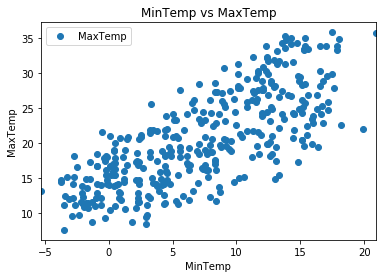

In [9]:
dataset.plot(x='MinTemp', y='MaxTemp', style='o')  
plt.title('MinTemp vs MaxTemp')  
plt.xlabel('MinTemp')  
plt.ylabel('MaxTemp')  
plt.show()

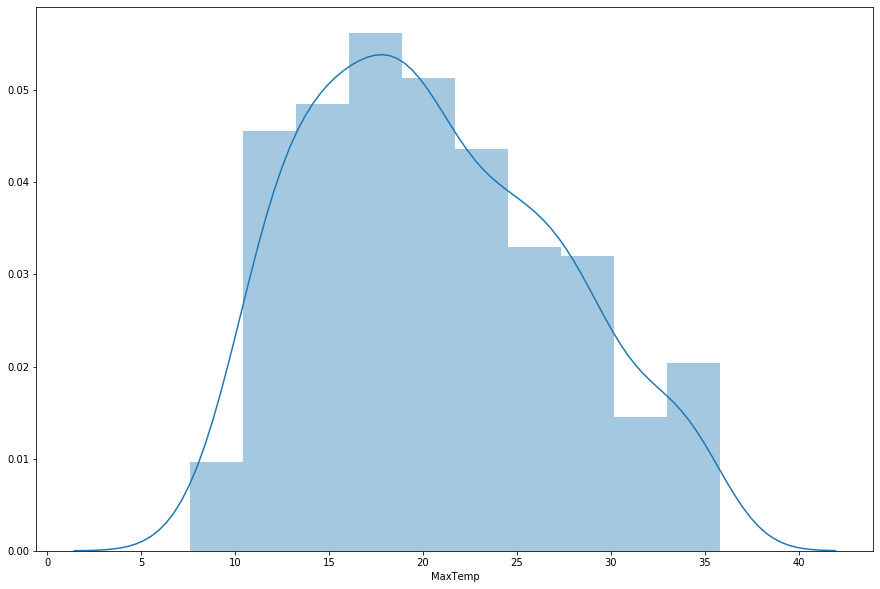

In [10]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['MaxTemp'])

In [11]:
X = dataset['MinTemp'].values.reshape(-1,1)
y = dataset['MaxTemp'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Linear regression

In [12]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[14.56202411]
[[0.81953755]]


In [14]:
y_pred = regressor.predict(X_test)

In [15]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,25.2,23.413030
1,11.5,13.086857
2,21.1,27.264856
3,22.2,25.461874
4,20.4,26.937041
...,...,...
69,18.9,20.216833
70,22.8,27.674625
71,16.1,21.446140
72,25.1,24.970151


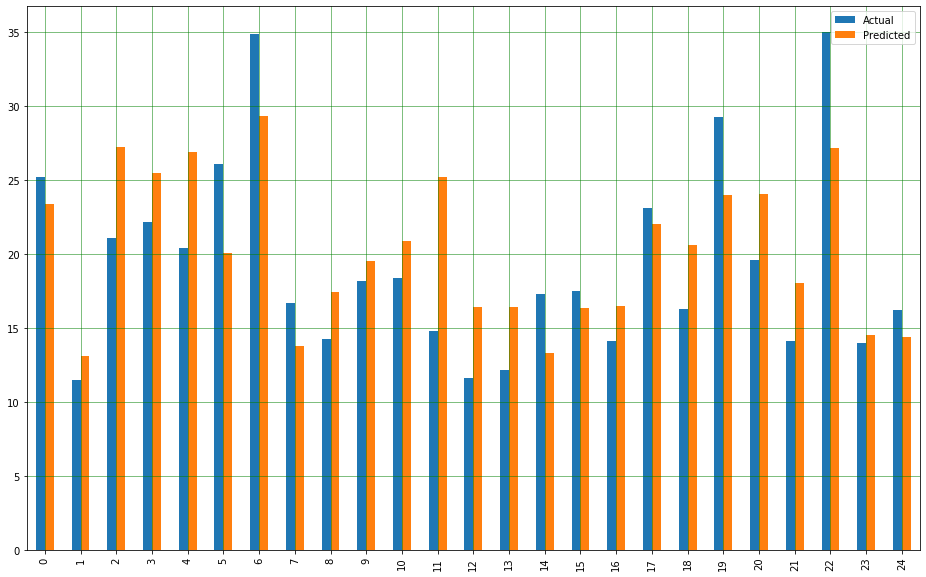

In [16]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

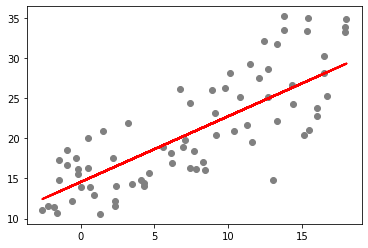

In [17]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [18]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.5094353112899594
Mean Squared Error: 17.011877668640622
Root Mean Squared Error: 4.124545753006096


# Multiple linear regression

In [19]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [20]:
dataset = pd.read_csv('data/winequality-red.csv')

In [21]:
dataset.shape

(1599, 12)

In [22]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [23]:
dataset.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [24]:
dataset = dataset.fillna(method='ffill')

In [25]:
X = dataset[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates','alcohol']].values
y = dataset['quality'].values

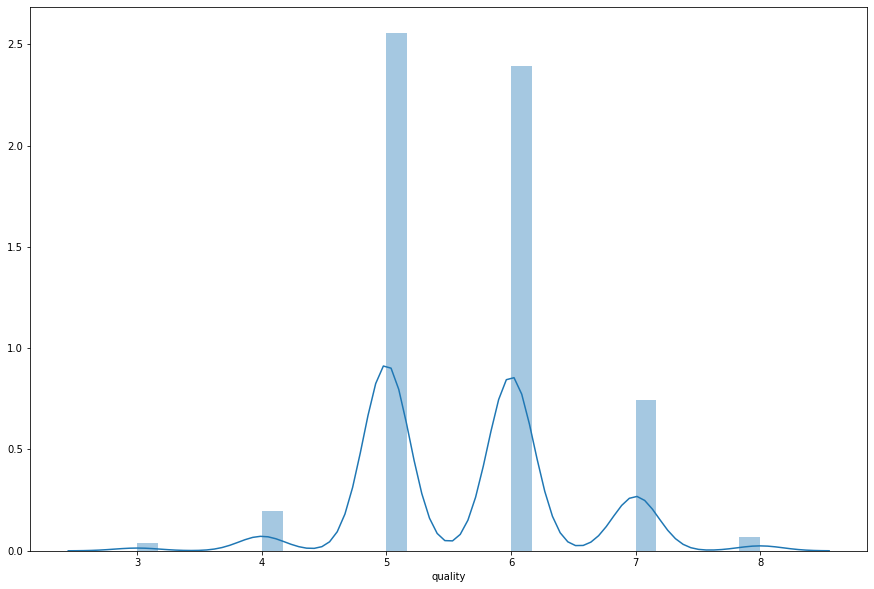

In [26]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['quality'])

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [28]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
X.columns
# coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
# coeff_df

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [30]:
y_pred = regressor.predict(X_test)

In [31]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)
df1

,Actual,Predicted
0,6,5.782930
1,5,5.036193
2,7,6.596989
3,6,5.339126
4,5,5.939529
5,6,5.007207
6,5,5.396162
7,6,6.052112
8,4,4.867603
9,5,4.950676


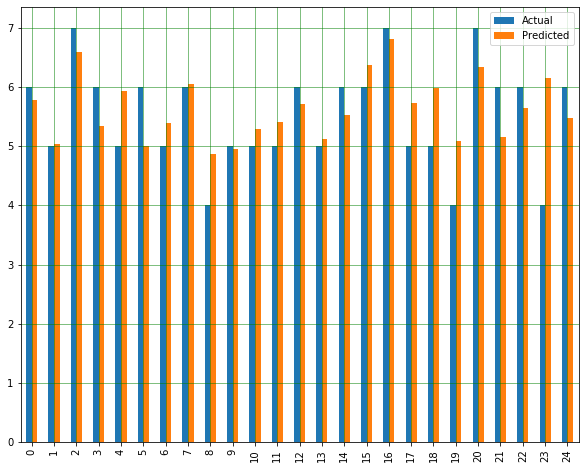

In [32]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [33]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.4696330928661105
Mean Squared Error: 0.38447119782012384
Root Mean Squared Error: 0.6200574149384264


# Lasso

In [34]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

alpha = 0.1
lasso = Lasso(alpha=alpha)

y_pred_lasso = lasso.fit(X_train, y_train).predict(X_test)
r2_score_lasso = r2_score(y_test, y_pred_lasso)
print(r2_score_lasso)

0.2595240864015237


# ElasticNet

In [35]:
from sklearn.linear_model import ElasticNet

enet = ElasticNet(alpha=alpha, l1_ratio=0.7)

y_pred_enet = enet.fit(X_train, y_train).predict(X_test)
r2_score_enet = r2_score(y_test, y_pred_enet)
print(enet)
print("r^2 on test data : %f" % r2_score_enet)


ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.7,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
r^2 on test data : 0.266957


In [36]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_enet})
df1 = df.head(25)
df1

,Actual,Predicted
0,6,5.857584
1,5,5.462496
2,7,6.095498
3,6,5.672387
4,5,5.894288
5,6,5.125525
6,5,5.583512
7,6,5.913319
8,4,5.478909
9,5,5.175320


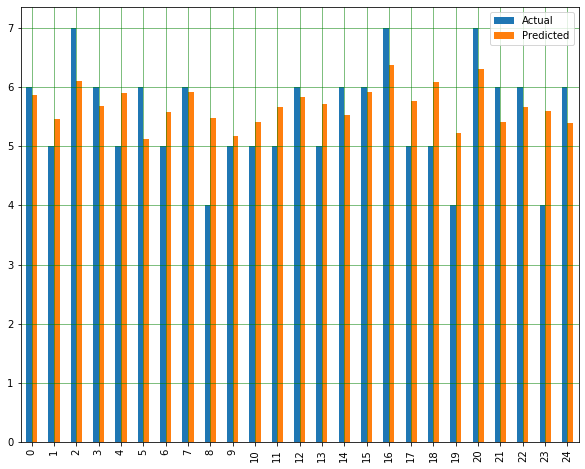

In [37]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Random forest

In [38]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=160, max_depth=80)

y_pred_forest = forest.fit(X_train, y_train).predict(X_test)
r2_score_forest = r2_score(y_test, y_pred_forest)
print(forest)
print("r^2 on test data : %f" % r2_score_forest)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=80, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=160, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
r^2 on test data : 0.442532


## Grid search cross validation

In [39]:
from sklearn.model_selection import GridSearchCV

no_estimator_candidates = [10, 20, 40, 80, 160]
max_depth_candidates = [10, 20, 40, 80, 160]
param_grid = {'n_estimators': no_estimator_candidates, 'max_depth' : max_depth_candidates}
gscv = GridSearchCV(forest, param_grid, cv=10)

gscv.fit(X_train, y_train)
print("Best params :", gscv.best_params_)
print("Best score :", gscv.best_score_)

Best params : {'max_depth': 80, 'n_estimators': 80}
Best score : 0.47888307974512834


In [40]:
# y_train_pred = gscv.predict(x_train)
y_test_pred = gscv.predict(X_test)
r2_score_forest = r2_score(y_test, y_test_pred)
print("r^2 on test data : %f" % r2_score_forest)

r^2 on test data : 0.454075


## Random search cross validation

In [41]:
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as stats
import numpy as np

param_dist = {'n_estimators': range(10, 160),
              'max_depth': range(10,160)}

gscv = RandomizedSearchCV(forest, param_dist, cv=10, n_iter=20, scoring='r2')

gscv.fit(X_train, y_train)
print("Best params :", gscv.best_params_)
print("Best score :", gscv.best_score_)

Best params : {'n_estimators': 86, 'max_depth': 91}
Best score : 0.4709608495447963


In [42]:
# y_train_pred = gscv.predict(x_train)
y_test_pred = gscv.predict(X_test)
r2_score_forest = r2_score(y_test, y_test_pred)
print("r^2 on test data : %f" % r2_score_forest)

r^2 on test data : 0.429243


In [43]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error: 0.4101380813953489
Mean Squared Error: 0.32673615805840994
Root Mean Squared Error: 0.5716083957207154


# Post popularity prediction

In [47]:
dataset = pd.read_csv('../features_complete_v2.csv')
dataset.shape

(6007, 32)

In [48]:
dataset.describe()

,comments count,section,type,person,people,cat,dog,other animal,poster,clothing,...,kw_2,kw_3,kw_4,kw_5,kw_6,kw_7,kw_8,kw_9,kw_10,score
count,6007.000000,6007.000000,6007.000000,6007.000000,6007.000000,6007.000000,6007.000000,6007.000000,6007.000000,6007.000000,...,6007.0,6007.0,6007.0,6007.0,6007.0,6007.0,6007.0,6007.0,6007.0,6007.000000
mean,71.330281,2.029133,1.290994,0.275512,0.142667,0.020809,0.021475,0.016814,0.037290,0.119194,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.321914
std,153.086018,0.760530,0.454258,0.446809,0.349762,0.142757,0.144973,0.128584,0.189487,0.324044,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.028940
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
25%,5.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.809028
50%,20.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.000000
75%,80.000000,3.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.225626
max,2707.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.012500


In [49]:
dataset

,id,comments count,section,type,person,people,cat,dog,other animal,poster,...,kw_2,kw_3,kw_4,kw_5,kw_6,kw_7,kw_8,kw_9,kw_10,score
0,a0Nv0Pd,62,1,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,17.981013
1,a0Nv1bq,506,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,30.766816
2,a0Nv1jn,389,1,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,29.827362
3,a0Nv3ed,22,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,37.266667
4,a0Nv4Yv,77,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,19.294118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6002,aZyqYGX,17,2,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,13.641026
6003,aZyqYm9,14,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.846154
6004,aZyqYNn,37,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12.676768
6005,aZyqYVn,22,2,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12.403846


In [64]:
# Podela na trening i test skup
X = dataset[['comments count', 'section', 'type', 'person', 'people', 'cat', 'dog', 
             'other animal', 'poster', 'clothing', 'car', 'toy', 'tree', 'glasses', 
             'building', 'electronic device', 'airplane', 'guitar', 'pattern', 
             'comments', 'kw_1', 'kw_2', 'kw_3', 'kw_4', 'kw_5', 'kw_6', 'kw_7', 
             'kw_8', 'kw_9', 'kw_10',]].values
y = dataset['score'].values

if len(X[0]) != 30 or len(X) != 6007:
    raise

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [65]:
multi_linear_regressor = LinearRegression()  
multi_linear_regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [67]:
y_pred = multi_linear_regressor.predict(X_test)

In [68]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)
df1

,Actual,Predicted
0,3.400000,14.434651
1,1.888889,5.462420
2,3.625000,4.151208
3,22.696809,26.432254
4,7.226415,24.896103
5,14.915344,26.510629
6,6.941176,16.671891
7,26.491329,26.346041
8,7.915254,15.326548
9,26.000000,5.139312


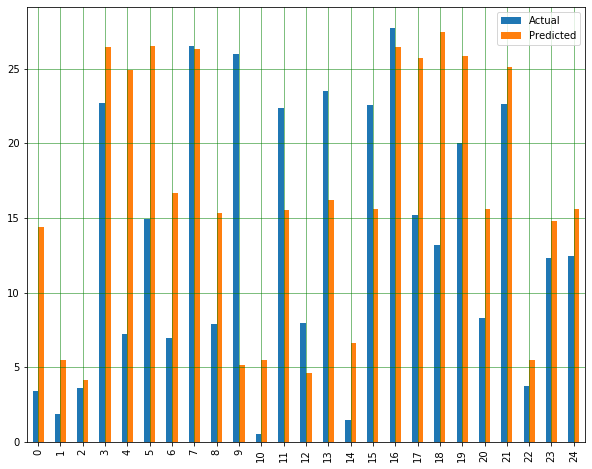

In [69]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [72]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

r2_score = r2_score(y_test, y_pred)
print("r^2 on test data : %f" % r2_score)

Mean Absolute Error: 7.796124913245358
Mean Squared Error: 123.27149581488536
Root Mean Squared Error: 11.102769736191297
r^2 on test data : 0.347876
